# Exploratory Data Analysis

###### The data only focused on Covid-19 case occured in Indonesia.

In [1]:
!pip install seaborn==0.9.0
import pandas as pd

pd.set_option('display.max_rows', None)

df = pd.read_csv("cleaned_data.csv")
df.head()

You should consider upgrading via the 'c:\users\asus\anaconda3\python.exe -m pip install --upgrade pip' command.


,Unnamed: 0,ObservationDate,total_infected,total_dead,total_recovered,deaths_per_day,infected_per_day,recovered_per_day,infected
0,0,2020-03-02,2.0,0.0,0.0,0.0,2.0,0.0,2.0
1,1,2020-03-03,2.0,0.0,0.0,0.0,0.0,0.0,2.0
2,2,2020-03-04,2.0,0.0,0.0,0.0,0.0,0.0,2.0
3,3,2020-03-05,2.0,0.0,0.0,0.0,0.0,0.0,2.0
4,4,2020-03-06,4.0,0.0,0.0,0.0,2.0,0.0,4.0


### Remove Unnamed: 0 Column

In [2]:
df = df.drop(["Unnamed: 0"], axis=1)
df = df.rename(columns={"ObservationDate" : "observation_date"})
df["observation_date"] = pd.to_datetime(df.observation_date)
df.head()

,observation_date,total_infected,total_dead,total_recovered,deaths_per_day,infected_per_day,recovered_per_day,infected
0,2020-03-02,2.0,0.0,0.0,0.0,2.0,0.0,2.0
1,2020-03-03,2.0,0.0,0.0,0.0,0.0,0.0,2.0
2,2020-03-04,2.0,0.0,0.0,0.0,0.0,0.0,2.0
3,2020-03-05,2.0,0.0,0.0,0.0,0.0,0.0,2.0
4,2020-03-06,4.0,0.0,0.0,0.0,2.0,0.0,4.0


### Exploratory Data Analysis

Total Infected Growth


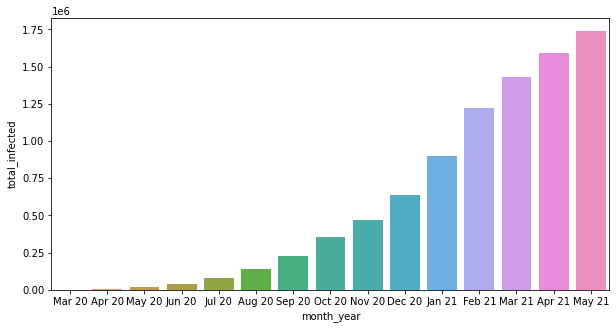

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

df['month_year'] = df['observation_date'].dt.strftime('%b %y')
print("Total Infected Growth")
fig = plt.figure(figsize=(10,5))
chart = sns.barplot(x=df.month_year, y=df.total_infected, ci=None)
plt.show()

Total Dead Growth


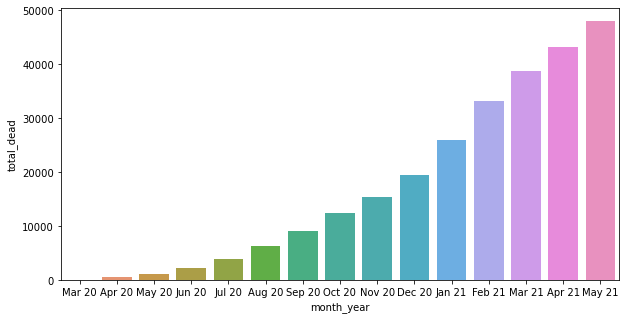

In [65]:
print("Total Dead Growth")
fig = plt.figure(figsize=(10,5))
chart = sns.barplot(x=df.month_year, y=df.total_dead, ci=None)
plt.show()

Total Recovered Growth


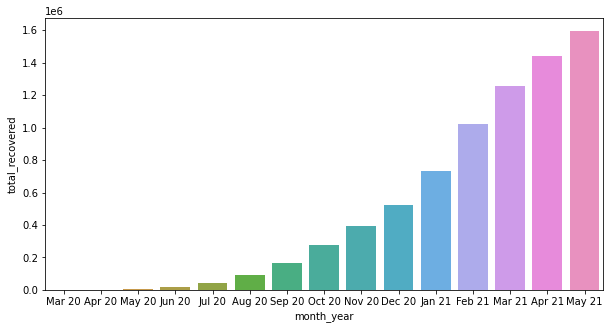

In [64]:
print("Total Recovered Growth")
fig = plt.figure(figsize=(10,5))
chart = sns.barplot(x=df.month_year, y=df.total_recovered, ci=None)
plt.show()

###### Based on these charts above, it can be described that the growth of Covid-19 based on the sum of identified case, death count, and recovered count are continuously growing month to month starting from March 2020 to May 2021.

Infected Per Day Chart


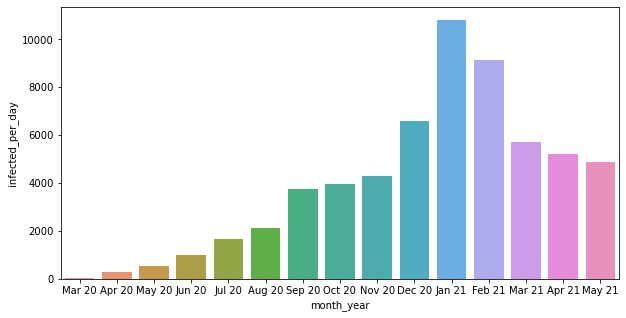

In [63]:
print("Infected Per Day Chart")
plt.figure(figsize=(10,5))
chart = sns.barplot(x=df.month_year, y=df.infected_per_day, ci=None)
plt.show()

Deaths Per Day Chart


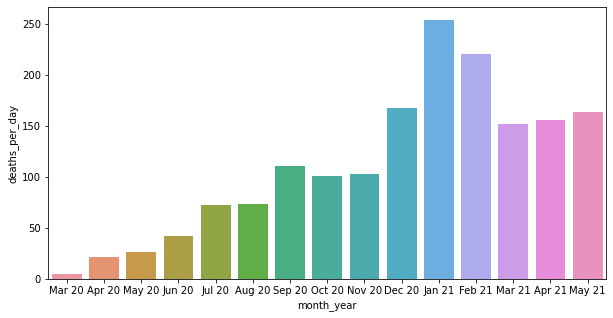

In [61]:
print("Deaths Per Day Chart")
plt.figure(figsize=(10,5))
chart = sns.barplot(x=df.month_year, y=df.deaths_per_day, ci=None)
plt.show()

Recovered Per Day Chart


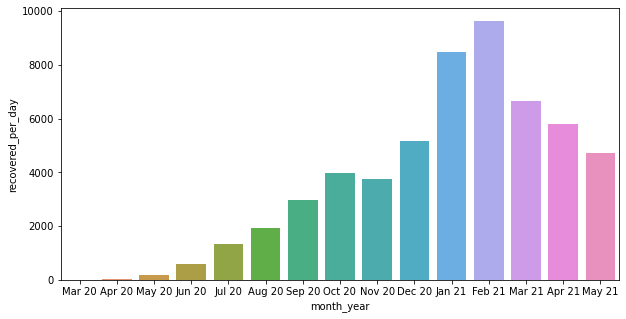

In [76]:
print("Recovered Per Day Chart")
plt.figure(figsize=(10,5))
chart = sns.barplot(x=df.month_year, y=df.recovered_per_day, ci=None)
plt.show()

###### Based on these charts above, infected and recovered count per day are decreasing as of March 2021. However, the death count are slightly increasing through May 2021.

### Check for deaths per day from March 2021 to May 2021

In [18]:
df_mar_may = df[df.observation_date >= "2021-03-01"]
df_mar_may.head()

,observation_date,total_infected,total_dead,total_recovered,deaths_per_day,infected_per_day,recovered_per_day,infected,month_year
364,2021-03-01,1341314.0,36325.0,1151915.0,159.0,6680.0,9212.0,153074.0,Mar 21
365,2021-03-02,1347026.0,36518.0,1160863.0,193.0,5712.0,8948.0,149645.0,Mar 21
366,2021-03-03,1353834.0,36721.0,1169916.0,203.0,6808.0,9053.0,147197.0,Mar 21
367,2021-03-04,1361098.0,36897.0,1176356.0,176.0,7264.0,6440.0,147845.0,Mar 21
368,2021-03-05,1368069.0,37026.0,1182687.0,129.0,6971.0,6331.0,148356.0,Mar 21


In [194]:
import numpy as np

# convert per_day data into log for better visual
df_mar_may["infected_per_day_log"] = np.log(df_mar_may["infected_per_day"])
df_mar_may["deaths_per_day_log"] = np.log(df_mar_may["deaths_per_day"])
df_mar_may["recovered_per_day_log"] = np.log(df_mar_may["recovered_per_day"])
df_mar_may.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9464\1506250657.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mar_may["infected_per_day_log"] = np.log(df_mar_may["infected_per_day"])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_9464\1506250657.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mar_may["deaths_per_day_log"] = np.log(df_mar_may["deaths_per_day"])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_9464\1506250657.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

,observation_date,total_infected,total_dead,total_recovered,deaths_per_day,infected_per_day,recovered_per_day,infected,month_year,infected_per_day_log,deaths_per_day_log,recovered_per_day_log
364,2021-03-01,1341314.0,36325.0,1151915.0,159.0,6680.0,9212.0,153074.0,Mar 21,8.806873,5.068904,9.128262
365,2021-03-02,1347026.0,36518.0,1160863.0,193.0,5712.0,8948.0,149645.0,Mar 21,8.650325,5.262690,9.099185
366,2021-03-03,1353834.0,36721.0,1169916.0,203.0,6808.0,9053.0,147197.0,Mar 21,8.825854,5.313206,9.110851
367,2021-03-04,1361098.0,36897.0,1176356.0,176.0,7264.0,6440.0,147845.0,Mar 21,8.890686,5.170484,8.770284
368,2021-03-05,1368069.0,37026.0,1182687.0,129.0,6971.0,6331.0,148356.0,Mar 21,8.849514,4.859812,8.753213


In [71]:
df_melted = df_mar_may.melt("observation_date", value_vars=("infected_per_day_log", "deaths_per_day_log", "recovered_per_day_log"), var_name="cols", value_name="vals")
df_melted.head(100)

,observation_date,cols,vals
0,2021-03-01,infected_per_day_log,8.806873
1,2021-03-02,infected_per_day_log,8.650325
2,2021-03-03,infected_per_day_log,8.825854
3,2021-03-04,infected_per_day_log,8.890686
4,2021-03-05,infected_per_day_log,8.849514
5,2021-03-06,infected_per_day_log,8.659907
6,2021-03-07,infected_per_day_log,8.670086
7,2021-03-08,infected_per_day_log,8.838407
8,2021-03-09,infected_per_day_log,8.762333
9,2021-03-10,infected_per_day_log,8.636397


Per Day Data From March 2021 to May 2021


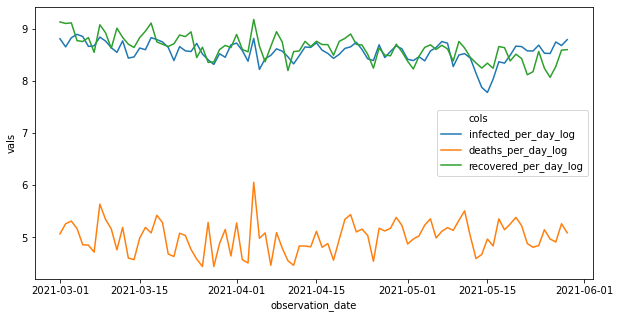

In [196]:
print("Per Day Data From March 2021 to May 2021")
plt.figure(figsize=(10,5))
sns.lineplot(x=df_melted.observation_date, y=df_melted.vals, hue=df_melted.cols)
plt.show()

###### From the chart above, death counts are far from infected and recovered counts. Infected and recovered counts are moving almost similarly.

Deaths Per Day Chart


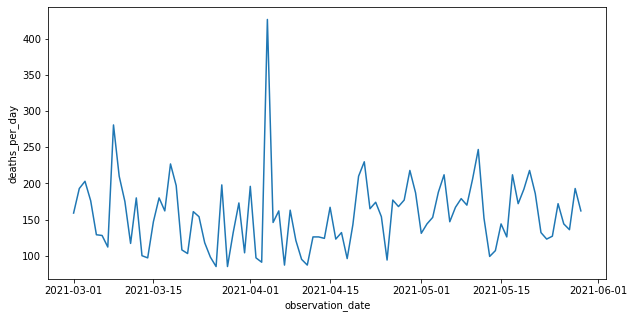

In [195]:
print("Deaths Per Day Chart")
plt.figure(figsize=(10,5))
sns.lineplot(x=df_mar_may.observation_date, y=df_mar_may.deaths_per_day)
plt.show()

In [59]:
df_mar_may[df_mar_may.deaths_per_day == max(df_mar_may.deaths_per_day)]

,observation_date,total_infected,total_dead,total_recovered,deaths_per_day,infected_per_day,recovered_per_day,infected,month_year
398,2021-04-04,1534255.0,41669.0,1375877.0,427.0,6731.0,9663.0,116709.0,Apr 21


In [204]:
df_mar_may.loc[(df_mar_may.observation_date >= "2021-04-01") & (df_mar_may.observation_date <= "2021-04-10")][["observation_date", "infected_per_day", "deaths_per_day", "recovered_per_day"]]

,observation_date,infected_per_day,deaths_per_day,recovered_per_day
395,2021-04-01,6142.0,196.0,7248.0
396,2021-04-02,5325.0,97.0,5439.0
397,2021-04-03,4345.0,91.0,5197.0
398,2021-04-04,6731.0,427.0,9663.0
399,2021-04-05,3712.0,146.0,5800.0
400,2021-04-06,4549.0,162.0,4296.0
401,2021-04-07,4860.0,87.0,5769.0
402,2021-04-08,5504.0,163.0,7640.0
403,2021-04-09,5265.0,121.0,6277.0
404,2021-04-10,4723.0,95.0,3629.0


In [206]:
df_mar_may.loc[(df_mar_may.observation_date >= "2021-04-01") & (df_mar_may.observation_date <= "2021-04-10")]["deaths_per_day"].mean()

158.5

######  Based on the chart above, the death count seems to spike on April 4th, 2021. However, before and after the day, it seems to be normal with an average of 158.5 deaths per day.
###### The recovered count also seems to spike up on April 4th, 2021.

In [6]:
pd.pivot_table(df, index=["month_year", "observation_date"], values="infected_per_day", aggfunc="sum").sort_values("infected_per_day", ascending=False)

infected_per_day
month_year observation_date                  
Jan 21     2021-01-30                 14518.0
           2021-01-16                 14224.0
           2021-01-29                 13802.0
           2021-01-28                 13695.0
           2021-01-22                 13632.0
           2021-01-26                 13094.0
           2021-01-15                 12818.0
           2021-01-20                 12568.0
           2021-01-23                 12191.0
Feb 21     2021-02-06                 12156.0
Jan 21     2021-01-31                 12001.0
Feb 21     2021-02-03                 11984.0
Jan 21     2021-01-27                 11948.0
           2021-01-24                 11788.0
Feb 21     2021-02-05                 11749.0
Jan 21     2021-01-21                 11703.0
           2021-01-14                 11557.0
Feb 21     2021-02-04                 11434.0
Jan 21     2021-01-17                 11287.0
           2021-01-13                 11278.0
Feb 21     2021-02-01                 10994.0
           2021-02-07                 10827.0
Jan 21     2021-01-08                 10617.0
Feb 21     2021-02-19                 10614.0
           2021-02-02                 10379.0
Jan 21     2021-01-19                 10365.0
Feb 21     2021-02-22                 10180.0
Jan 21     2021-01-12                 10047.0
           2021-01-09                 10046.0
Feb 21     2021-02-16                 10029.0
Jan 21     2021-01-25                  9994.0
Feb 21     2021-02-12                  9869.0
           2021-02-23                  9775.0
           2021-02-17                  9687.0
Jan 21     2021-01-10                  9640.0
           2021-01-07                  9321.0
           2021-01-18                  9086.0
Feb 21     2021-02-18                  9039.0
Jan 21     2021-01-06                  8854.0
Feb 21     2021-02-13                  8844.0
           2021-02-10                  8776.0
           2021-02-09                  8700.0
Jan 21     2021-01-11                  8692.0
Feb 21     2021-02-25                  8493.0
           2021-02-11                  8435.0
Dec 20     2020-12-03                  8369.0
Feb 21     2021-02-08                  8242.0
           2021-02-26                  8232.0
Dec 20     2020-12-31                  8074.0
Jan 21     2021-01-01                  8072.0
Feb 21     2021-02-20                  8054.0
Dec 20     2020-12-30                  8002.0
           2020-12-29                  7903.0
           2020-12-19                  7751.0
Feb 21     2021-02-24                  7533.0
Dec 20     2020-12-23                  7514.0
Jan 21     2021-01-05                  7445.0
Dec 20     2020-12-17                  7354.0
Feb 21     2021-02-21                  7300.0
Mar 21     2021-03-04                  7264.0
Dec 20     2020-12-25                  7259.0
Jan 21     2021-01-02                  7203.0
Dec 20     2020-12-24                  7199.0
           2020-12-20                  6982.0
Mar 21     2021-03-05                  6971.0
           2021-03-08                  6894.0
Jan 21     2021-01-03                  6877.0
Dec 20     2020-12-21                  6848.0
Mar 21     2021-03-17                  6825.0
           2021-03-03                  6808.0
Feb 21     2021-02-14                  6765.0
Jan 21     2021-01-04                  6753.0
Dec 20     2020-12-26                  6740.0
Apr 21     2021-04-04                  6731.0
Dec 20     2020-12-16                  6725.0
           2020-12-18                  6689.0
Mar 21     2021-03-01                  6680.0
           2021-03-18                  6570.0
May 21     2021-05-29                  6565.0
Dec 20     2020-12-27                  6528.0
Feb 21     2021-02-15                  6462.0
Mar 21     2021-03-12                  6412.0
           2021-03-09                  6389.0
Dec 20     2020-12-12                  6388.0
           2020-12-22                  6347.0
May 21     2021-05-07      

##### From this table above, it shows that the peak of infected sum is occured in between January and February of 2021.

### Check for growth of finished case

In [84]:
df["cured_or_died"] = df.total_dead + df.total_recovered
df[df.cured_or_died > 0].head()

,observation_date,total_infected,total_dead,total_recovered,deaths_per_day,infected_per_day,recovered_per_day,infected,month_year,cured_or_died,cured_or_died_per_day
8,2020-03-10,27.0,0.0,2.0,0.0,8.0,2.0,25.0,Mar 20,2.0,2.0
9,2020-03-11,34.0,1.0,2.0,1.0,7.0,0.0,31.0,Mar 20,3.0,1.0
10,2020-03-12,34.0,1.0,2.0,0.0,0.0,0.0,31.0,Mar 20,3.0,0.0
11,2020-03-13,69.0,4.0,2.0,3.0,35.0,0.0,63.0,Mar 20,6.0,3.0
12,2020-03-14,96.0,5.0,8.0,1.0,27.0,6.0,83.0,Mar 20,13.0,7.0


In [83]:
df["cured_or_died_per_day"] = df.deaths_per_day + df.recovered_per_day
df[df.cured_or_died_per_day > 0].head()

,observation_date,total_infected,total_dead,total_recovered,deaths_per_day,infected_per_day,recovered_per_day,infected,month_year,cured_or_died,cured_or_died_per_day
8,2020-03-10,27.0,0.0,2.0,0.0,8.0,2.0,25.0,Mar 20,2.0,2.0
9,2020-03-11,34.0,1.0,2.0,1.0,7.0,0.0,31.0,Mar 20,3.0,1.0
11,2020-03-13,69.0,4.0,2.0,3.0,35.0,0.0,63.0,Mar 20,6.0,3.0
12,2020-03-14,96.0,5.0,8.0,1.0,27.0,6.0,83.0,Mar 20,13.0,7.0
16,2020-03-18,227.0,19.0,11.0,14.0,55.0,3.0,197.0,Mar 20,30.0,17.0


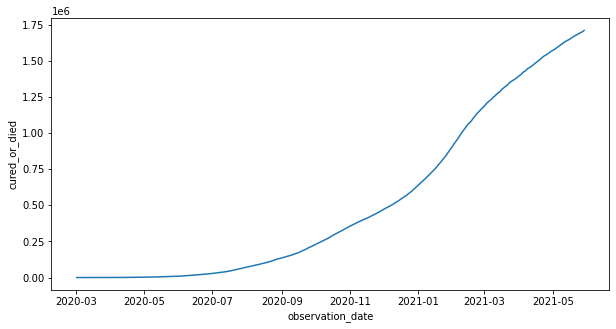

In [94]:
plt.figure(figsize=(10,5))
sns.lineplot(x=df.observation_date, y=df.cured_or_died, ci=None)
plt.show()

###### The chart above shows that the finished case is also growing.

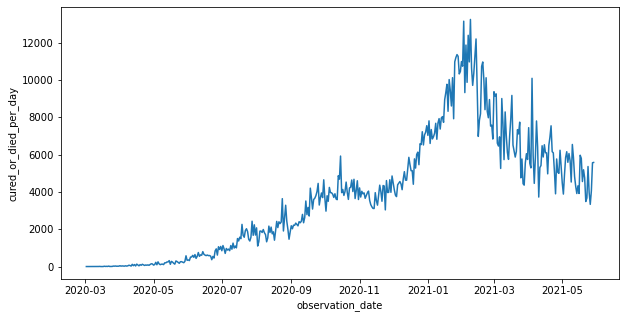

In [95]:
plt.figure(figsize=(10,5))
sns.lineplot(x=df.observation_date, y=df.cured_or_died_per_day, ci=None)
plt.show()

In [193]:
df[df.cured_or_died_per_day == max(df.cured_or_died_per_day)]["observation_date"]
date_max_finished = str(df.at[343, "observation_date"]).split(" ")[0]
print("Max finished case on graph: {} occured on date {}.".format(max(df.cured_or_died_per_day), date_max_finished))

Max finished case on graph: 13245.0 occured on date 2021-02-08.


###### The chart above shows that the finished case is dropping due to the fact that Covid-19 cases are also dropping.